In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('/content/iris.csv')
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/iris.csv'

In [3]:
df = pd.read_csv('/content/Iris.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Drop ID column (not useful for prediction)
df.drop('Id', axis=1, inplace=True)

# Map species to numbers
df['Species'] = df['Species'].astype('category')
df['target'] = df['Species'].cat.codes

# Define features (X) and target (y)
X = df.drop(['Species', 'target'], axis=1)
y = df['target']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


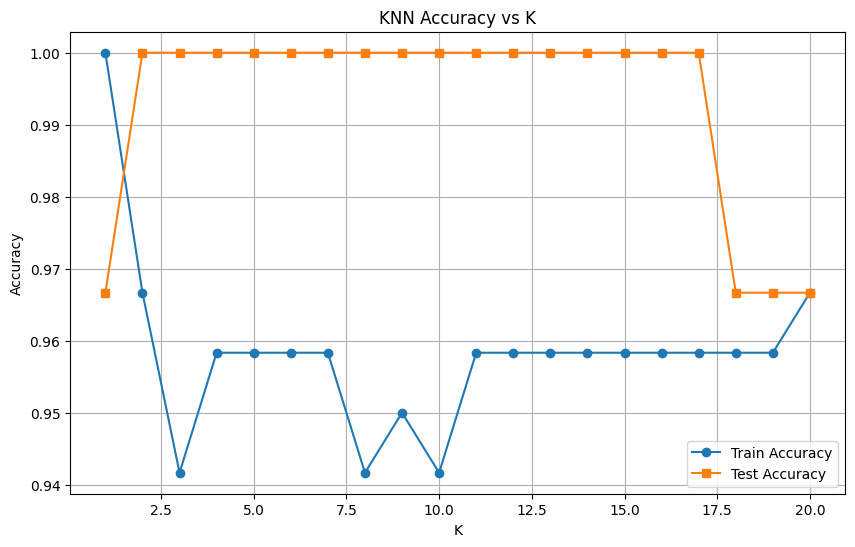

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

# Plot accuracy vs k
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), train_acc, marker='o', label='Train Accuracy')
plt.plot(range(1, 21), test_acc, marker='s', label='Test Accuracy')
plt.title("KNN Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 1.0


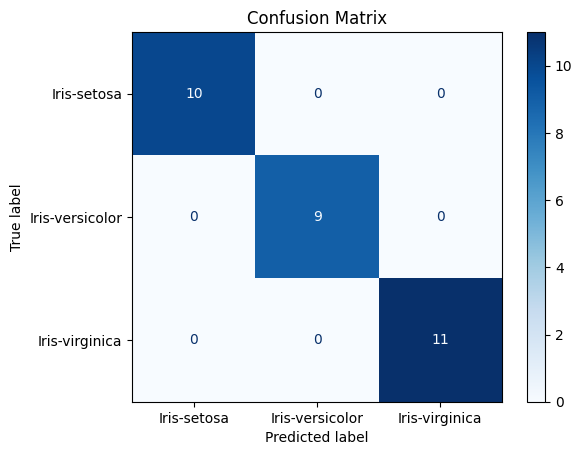

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Use best K, e.g., K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Species'].unique())
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


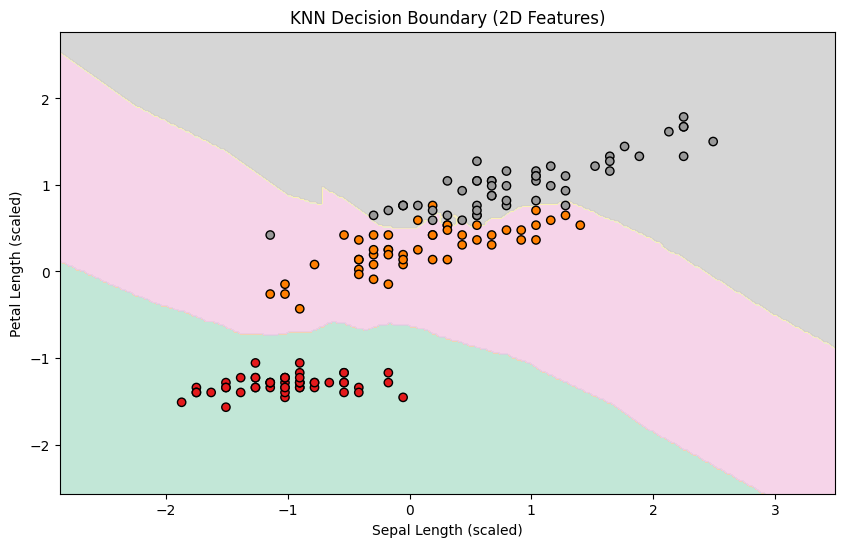

In [8]:
import numpy as np


X_vis = X_scaled[:, [0, 2]]
y_vis = y.values

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_vis, y_train_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Petal Length (scaled)')
plt.title('KNN Decision Boundary (2D Features)')
plt.show()
